In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os
import re
from pathlib import Path

In [2]:
# Read in the data
_DATA_DIR = "./data"

_dataset_loan_columns = ["loan_amnt", 
                         "int_rate", 
                         "term", 
                         "grade", 
                         "sub_grade", 
                         "installment", 
                         "annual_inc", 
                         "revol_bal",
                         "revol_util",
                         "loan_status", 
                         "verification_status", 
                         "title", "purpose", 
                         "emp_title", 
                         "addr_state", 
                         "zip_code"]

dataset_loans = {}
for file_name in os.listdir(_DATA_DIR):
    if file_name.endswith(".csv"):
        full_file_path = _DATA_DIR + "/" + file_name
        print(full_file_path)
        loan_period = re.search(r'\d{4}Q[0-4]{1}', file_name).group(0)
        dataset_loans[loan_period] = pd.read_csv(full_file_path, usecols=_dataset_loan_columns)[_dataset_loan_columns]

./data/LoanStats_2016Q1.csv
./data/LoanStats_2016Q2.csv
./data/LoanStats_2016Q3.csv
./data/LoanStats_2016Q4.csv
./data/LoanStats_2017Q1.csv
./data/LoanStats_2017Q2.csv
./data/LoanStats_2017Q3.csv
./data/LoanStats_2017Q4.csv
./data/LoanStats_2018Q1.csv
./data/LoanStats_2018Q2.csv
./data/LoanStats_2018Q3.csv
./data/LoanStats_2018Q4.csv


In [3]:
df = None

for k, dataset in dataset_loans.items():
#     print(k, len(dataset))
    if df is None:
        df = dataset
    else:
        df = df.append(dataset, ignore_index=True)

df["annual_inc"] = df["annual_inc"].astype(int)
        
print(f"Number of loans in combined dataset: {len(df)}")

Number of loans in combined dataset: 1373228


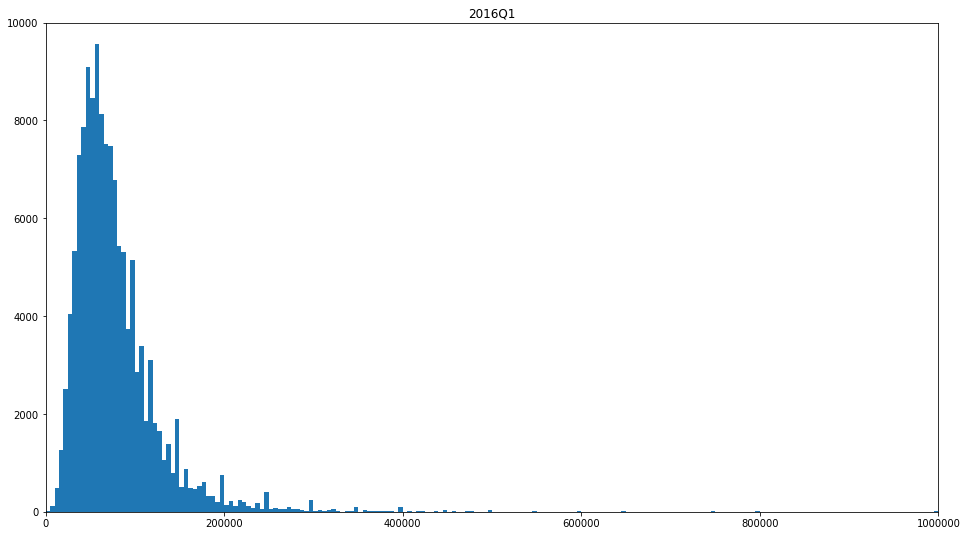

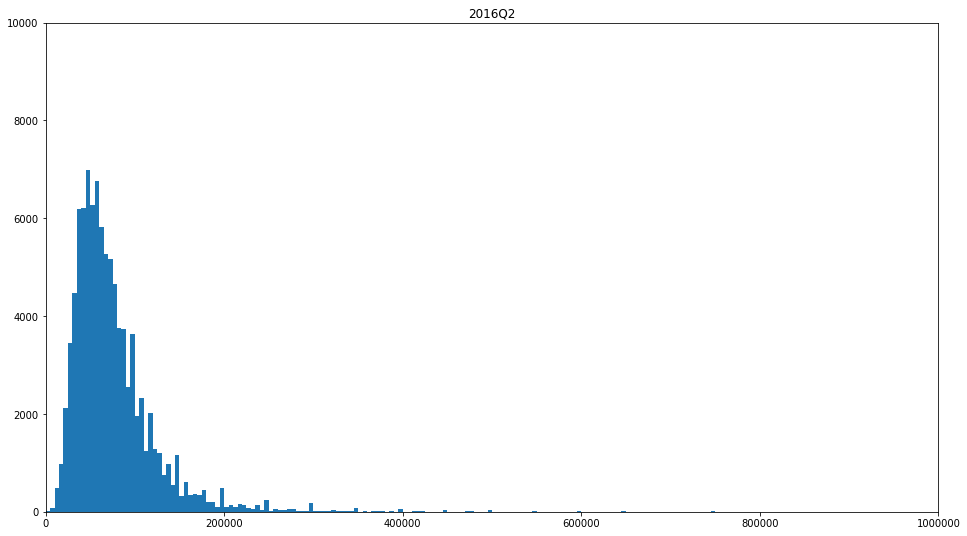

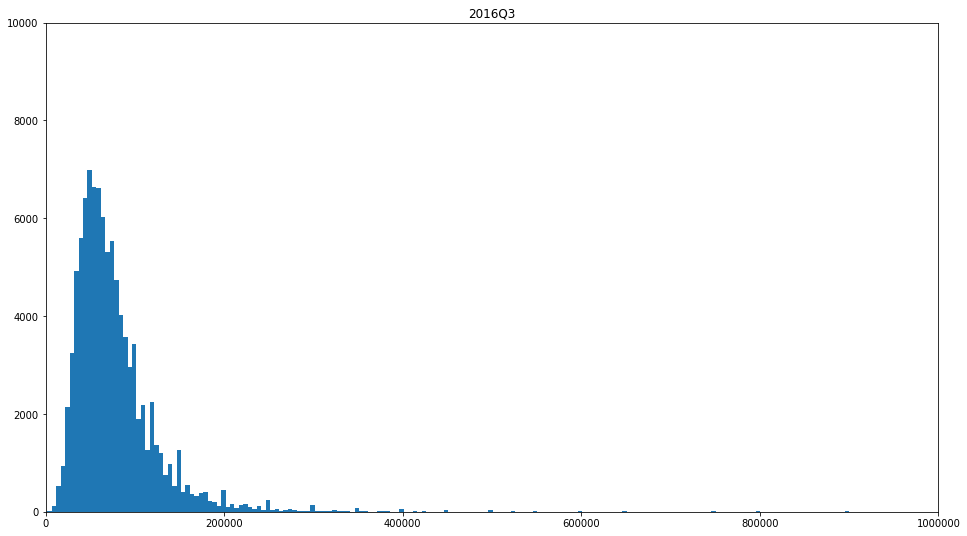

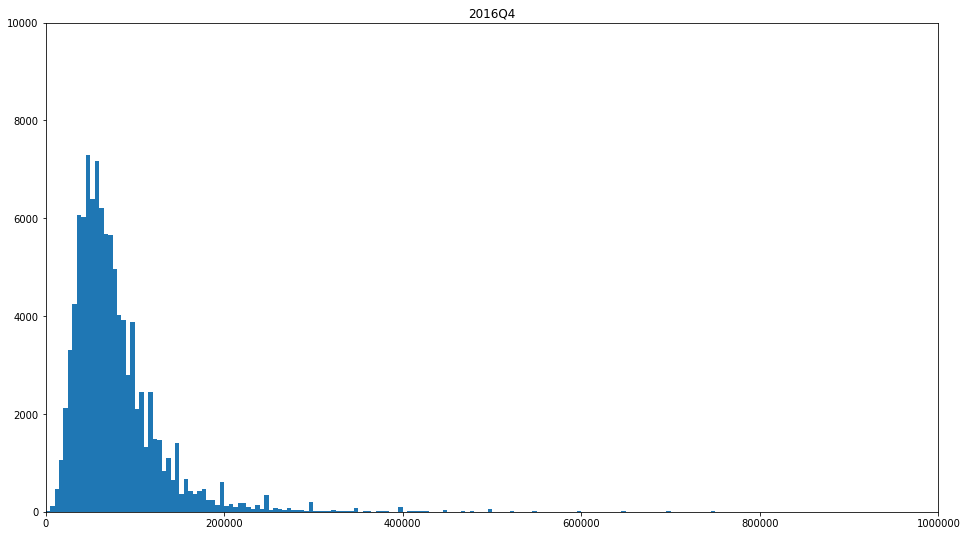

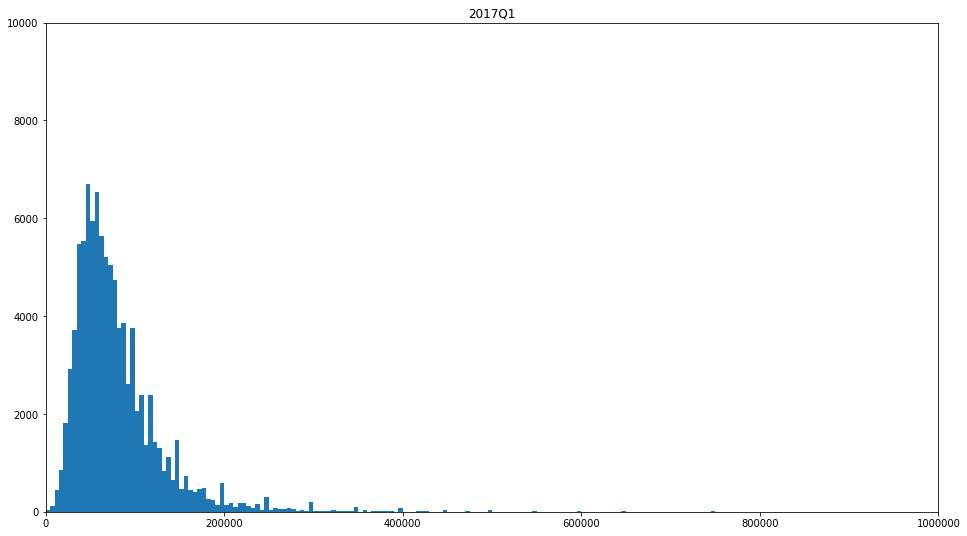

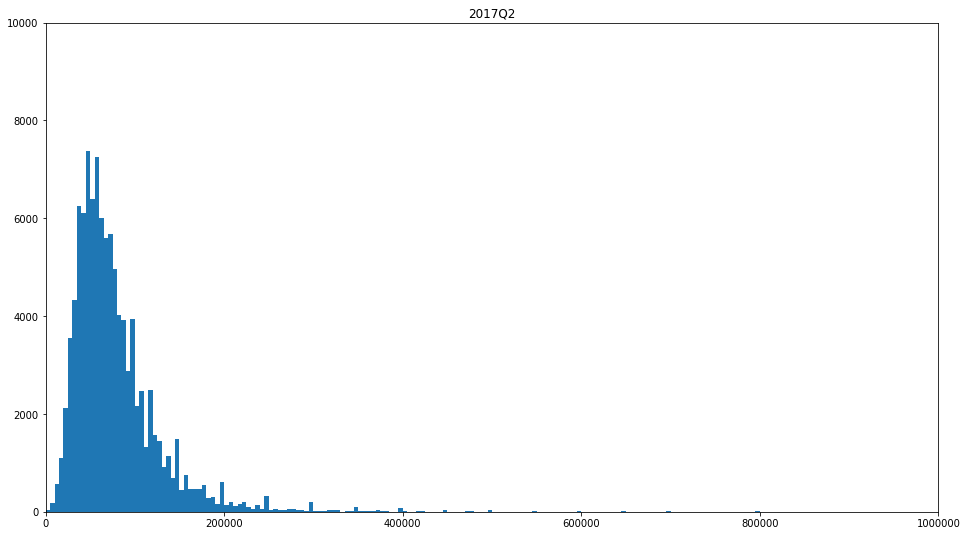

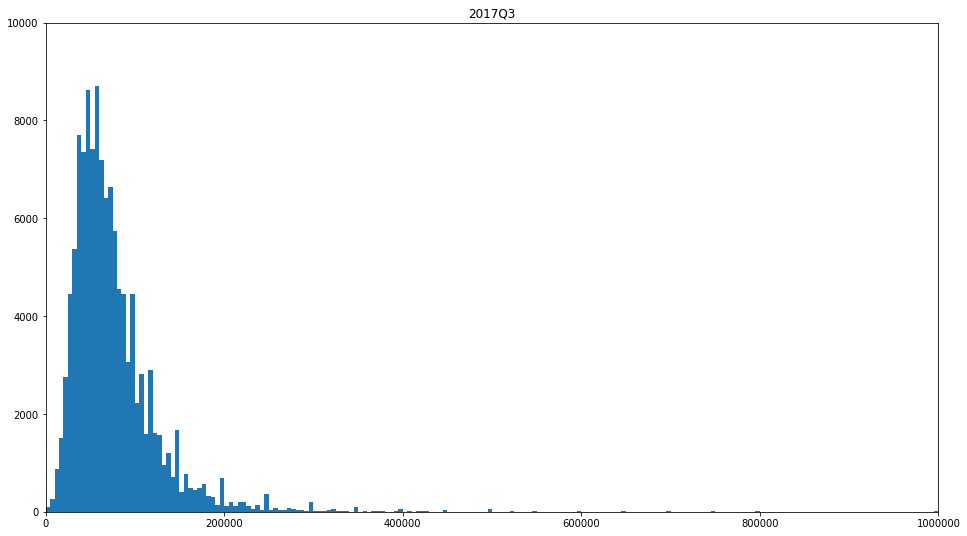

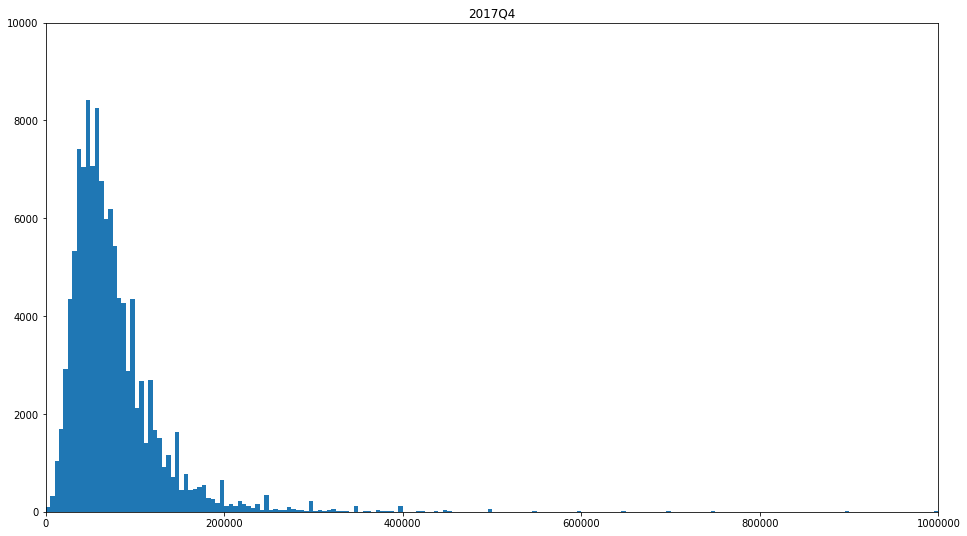

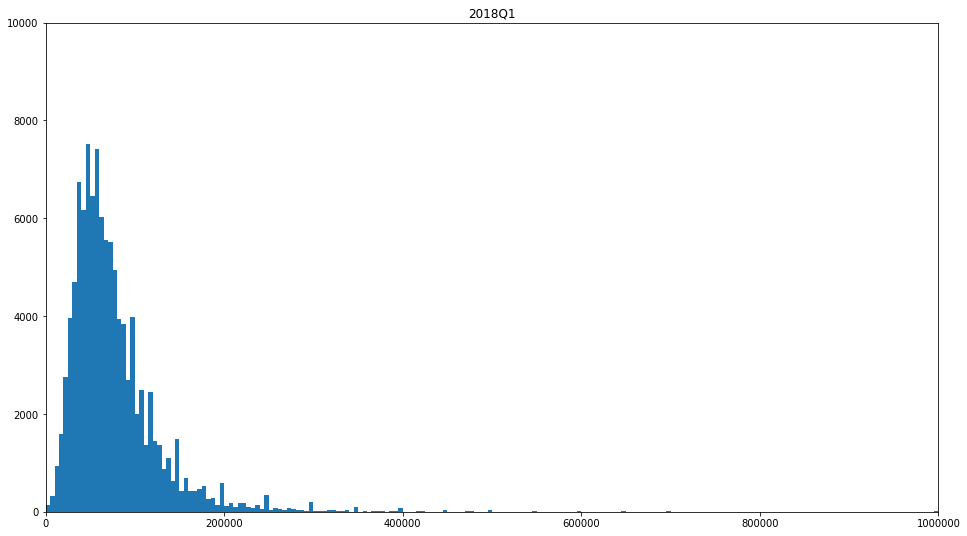

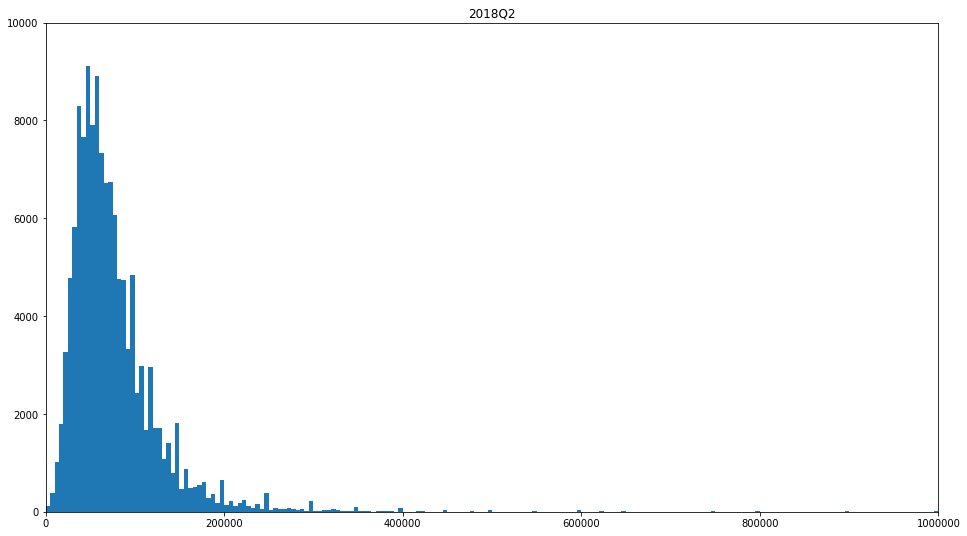

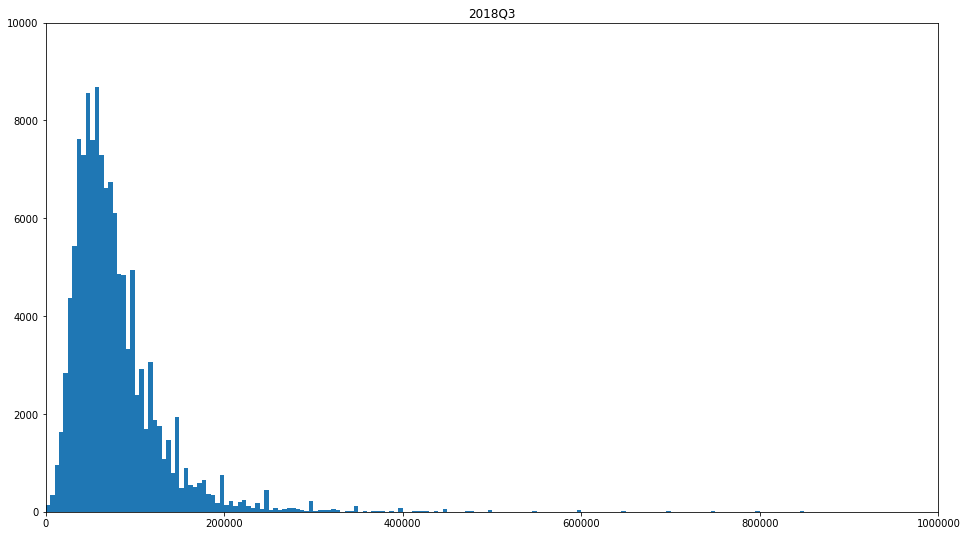

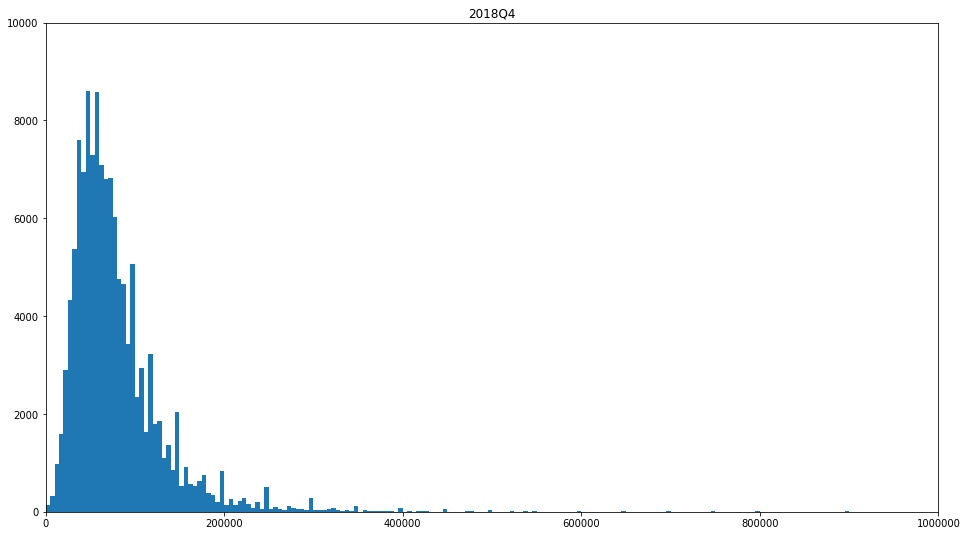

In [15]:
for k, dataset in dataset_loans.items():
    
    plt.figure(figsize=(16,9))

    plt.hist(dataset.loc[(dataset["annual_inc"] <= 1000000) & (dataset["annual_inc"] > 0)]["annual_inc"], bins=200)
    
    plt.xlim(left=0, right=1000000)
    plt.ylim(bottom=0, top=10000)
    
    plt.title(k)
#     plt.savefig(f"temp/{k}.png", bbox_inches='tight')
    plt.show()

In [5]:
max(dataset_loans["2016Q1"]["annual_inc"])

9550000.0

In [6]:
df.loc[df["annual_inc"] >= 9000000]

,loan_amnt,int_rate,term,grade,sub_grade,installment,annual_inc,revol_bal,revol_util,loan_status,verification_status,title,purpose,emp_title,addr_state,zip_code
21741,30000,7.89%,60 months,A,A5,606.72,9550000,758,0.9%,Fully Paid,Source Verified,Other,other,Building Official/Inspector,CA,905xx
217647,30000,7.39%,36 months,A,A4,931.68,9573072,31391,61.9%,Late (31-120 days),Source Verified,Debt consolidation,debt_consolidation,Sales,CA,926xx
220882,11600,15.31%,60 months,C,C5,277.86,9225000,1963,14.9%,Fully Paid,Source Verified,Car financing,car,Elevator Mechanic,VA,224xx
434738,24000,10.49%,60 months,B,B2,515.74,9300086,85918,67.2%,Current,Not Verified,Credit card refinancing,credit_card,Security officer/Bank supervisor,NY,112xx
453130,10000,11.44%,36 months,B,B4,329.48,61000000,14413,35.1%,Current,Source Verified,Debt consolidation,debt_consolidation,Waitress,VA,234xx
464825,35000,12.74%,36 months,C,C1,1174.91,9522972,28120,52.8%,Fully Paid,Source Verified,Debt consolidation,debt_consolidation,Officer,SC,294xx
647481,5000,18.06%,36 months,D,D2,180.92,10999200,534,41.1%,Fully Paid,Source Verified,Major purchase,major_purchase,Consultant,CA,913xx
708802,30000,9.93%,60 months,B,B2,636.38,110000000,20298,83.5%,Current,Verified,Debt consolidation,debt_consolidation,Engineer,NJ,073xx
1013874,8400,19.42%,36 months,D,D3,309.70,9300000,2654,39.6%,Fully Paid,Source Verified,Debt consolidation,debt_consolidation,Quality Mission Officer,MD,210xx
1101912,16000,14.07%,36 months,C,C3,547.39,9930475,23086,65.4%,Current,Source Verified,Debt consolidation,debt_consolidation,Manager,MD,208xx


In [7]:
# Why does a waitress making 61 million annual require a 10k loan?

df.loc[453130]

loan_amnt                           10000
int_rate                           11.44%
term                            36 months
grade                                   B
sub_grade                              B4
installment                        329.48
annual_inc                       61000000
revol_bal                           14413
revol_util                          35.1%
loan_status                       Current
verification_status       Source Verified
title                  Debt consolidation
purpose                debt_consolidation
emp_title                       Waitress 
addr_state                             VA
zip_code                            234xx
Name: 453130, dtype: object

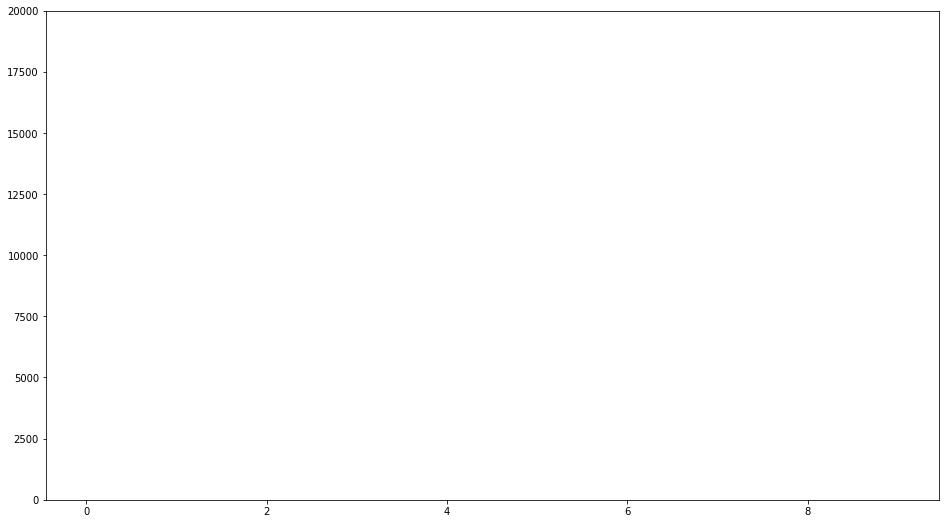

In [14]:
plt.figure(figsize=(16,9))

plt.hist([0,1,2,2,3,4,5,5,5,5,6,7,8,9], density=True)

plt.ylim(bottom=0, top=20000)

plt.show()